In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizaciones

In [2]:
df = pd.read_csv("../data/df_clientes_vuelos_visualizacion.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Booked_le_Total
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0,True
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0,True
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0,True
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0,True
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38,True


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

C:\Users\elepf\AppData\Local\Temp\ipykernel_16492\1080409015.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


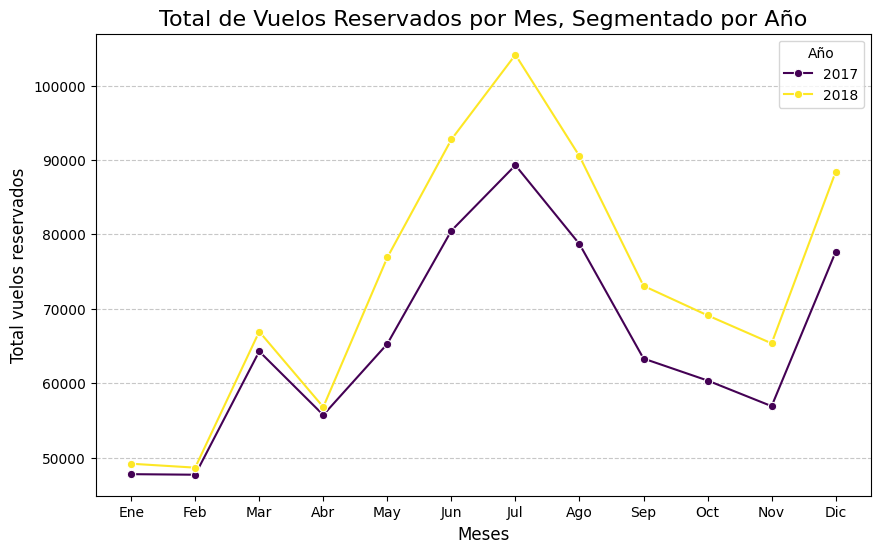

In [ ]:

# Agrupamos por Año y Mes, y calculamos la suma de 'Flights Booked'
df_tendencia = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_tendencia,
    x="Month",                  
    y="Flights Booked",         
    hue="Year",                 
    palette="viridis",          
    marker="o",                 
    errorbar=None                     
)

# --- Personalización ---
plt.title("Total de Vuelos Reservados por Mes, Segmentado por Año", fontsize=16)
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Total vuelos reservados", fontsize=12)
plt.xticks(range(1, 13), 
           labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title="Año")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> **Interpretación de la gráfica**
Podemos observar como cada año los picos de reserva ocurren en los mismos meses. Los meses de verano, especialmente julio, son los que albergan mayor cantidad de reservas. Siendo enero y febrero, los que menos. 
El año 2018 tuvo mayor cantidad de reservas. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

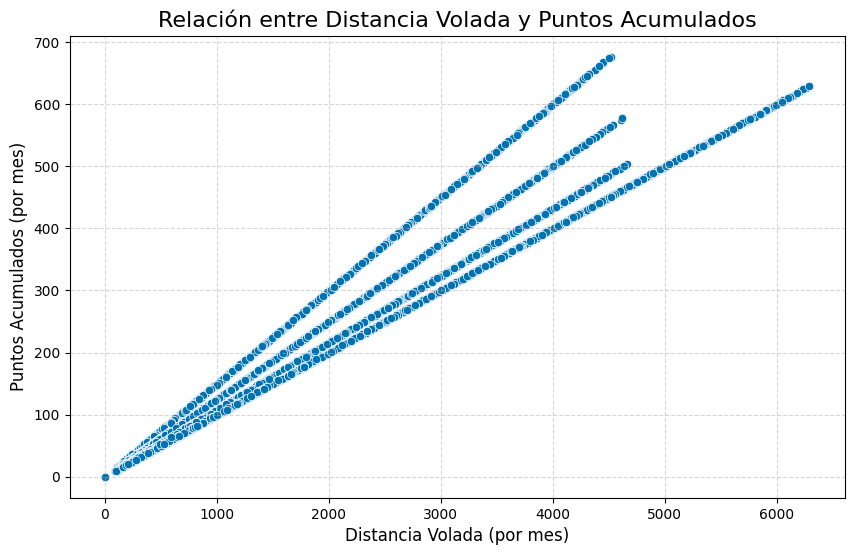

In [ ]:
plt.figure(figsize=(10, 6))

# Creamos el gráfico de dispersión
sns.scatterplot(
    data= df,
    x="Distance",           # Eje X: Causa o Variable Independiente
    y="Points Accumulated", # Eje Y: Efecto o Variable Dependiente
    color="#0072B2"         
)

# --- Personalización ---
plt.title("Relación entre Distancia Volada y Puntos Acumulados", fontsize=16)
plt.xlabel("Distancia Volada (por mes)", fontsize=12)
plt.ylabel("Puntos Acumulados (por mes)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

> **Interpretación de la gráfica**
Encontramos una relación evidente entre mayor distancia = más puntos acumulados

3. ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\elepf\AppData\Local\Temp\ipykernel_16492\3531441838.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


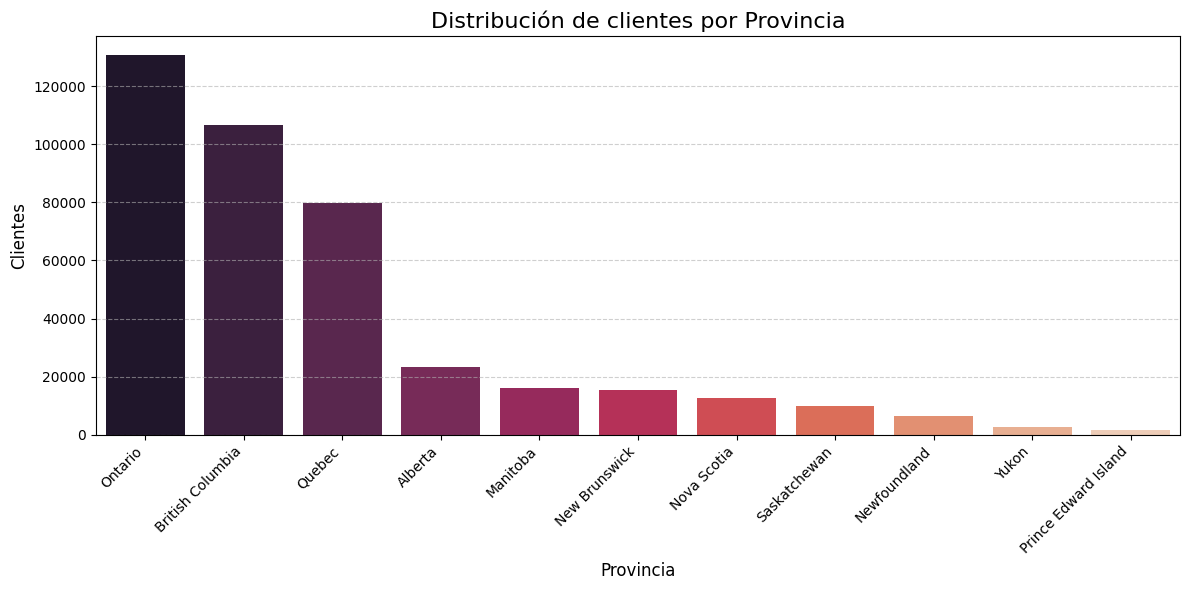

In [26]:
# Seleccionamos las columnas clave y eliminamos duplicados en el nivel del cliente.
# Aseguramos que cada cliente solo cuente una vez.
df_clientes_unicos = df.drop_duplicates(subset=['Loyalty Number'])

# Ahora, contamos cuántos clientes únicos hay por cada Provincia
df_conteo_provincia = df["Province"].value_counts().reset_index()
df_conteo_provincia.columns = ['Province', 'Total Clientes']


plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_conteo_provincia,
    x="Province",                  
    y="Total Clientes",            
    palette="rocket"              
)

# --- 3. Personalización ---
plt.title("Distribución de clientes por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Clientes", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta el gráfico para que las etiquetas no se corten
plt.show()

> **Interpretación:** Eje X: Provincias, Eje Y: Cantidad de clientes. Los bins muestran que en Ontario es donde la compañía tiene más clientes y en Prince Edward Island donde menos.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

C:\Users\elepf\AppData\Local\Temp\ipykernel_16492\285900621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


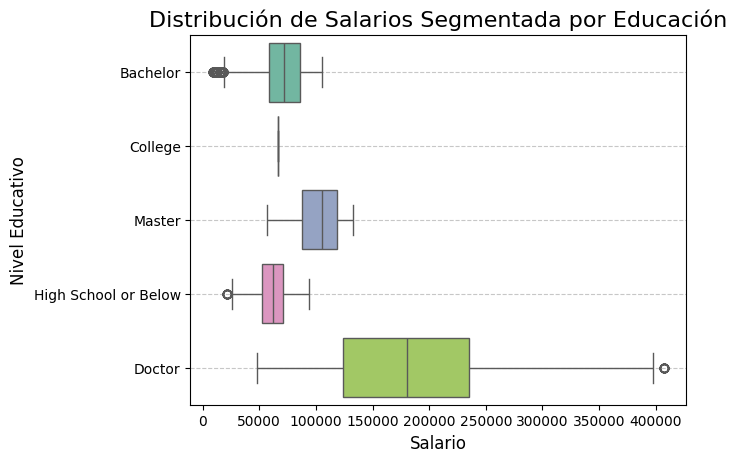

In [27]:
sns.boxplot(
    data=df,  
    x="Salary",                       
    y="Education",                                       
    palette="Set2",
    legend=False                                            
)

# Añade título y etiquetas
plt.title("Distribución de Salarios Segmentada por Educación", fontsize=16)
plt.xlabel("Salario", fontsize=12)
plt.ylabel("Nivel Educativo", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> **Interpretación:** Doctor es la categoría con más salario, pero también la que más alto espectro abarca. El rango va de aproximadamente 50.000 a 400.000, habiendo outliers por encima de ese rango. La mitad de los datos se concentrarn entre 125.000 y 235000, y la mediana está en torno a 180.000.


**Datos exactos de los cuartiles**

In [ ]:
resumen_salario_por_educacion = df.groupby("Education")["Salary"].describe()

print("--- Cuartiles y Estadísticas de Salario por Nivel Educativo ---")
resumen_salario_por_educacion

--- Cuartiles y Estadísticas de Salario por Nivel Educativo ---


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,253752.0,72601.235033,16670.286198,9081.0,58711.00,71971.0,85848.00,105563.0
College,102672.0,66937.500000,0.000000,66937.5,66937.50,66937.5,66937.50,66937.5
Doctor,17856.0,178335.439516,70307.642502,48109.0,124343.75,180440.0,235069.25,407228.0
High School or Below,19008.0,61112.377525,12105.086402,21853.0,52044.75,61806.0,71344.00,93875.0
Master,12336.0,103767.494163,17514.343573,56414.0,88120.00,105487.0,118530.00,133080.0


5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

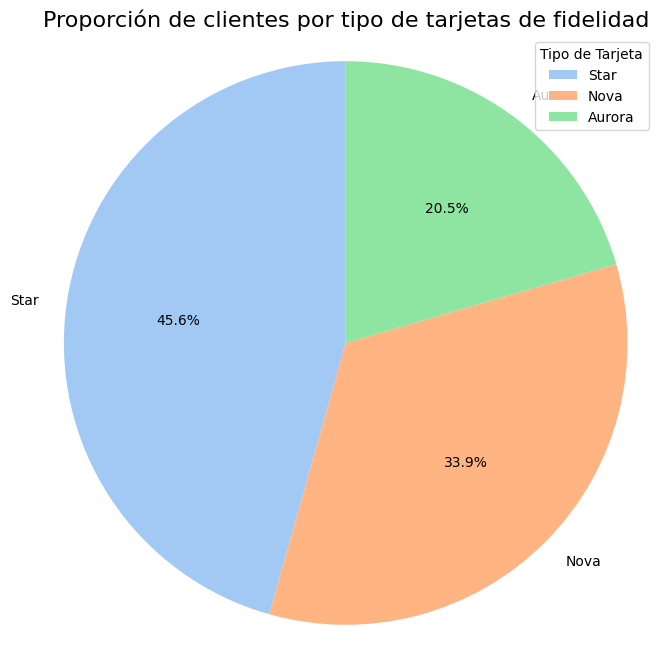

In [39]:
#Recuperamos el df_clientes_unicos, para obtener nuestro df sin duplicados.
df_clientes_unicos 

# Contar la frecuencia de cada tipo de tarjeta
conteo_tarjetas = df_clientes_unicos["Loyalty Card"].value_counts()

plt.figure(figsize=(8, 8))

# Parámetros para el gráfico circular
plt.pie(
    conteo_tarjetas,
    labels=conteo_tarjetas.index,  # Nombres de las tarjetas
    autopct='%1.1f%%',             # Formato para mostrar el porcentaje dentro de cada sección
    startangle=90,                 # Empieza el primer segmento desde la parte superior
    colors=sns.color_palette("pastel") # Usa una paleta de colores suave
)

plt.title("Proporción de clientes por tipo de tarjetas de fidelidad", fontsize=16)
plt.legend(title="Tipo de Tarjeta", loc="upper right")
plt.axis('equal') # Asegura que el gráfico sea un círculo perfecto
plt.show()

> **Interpretación**: Gráfico de "quesitos" que nos muestra de forma muy visual los porcentajes de clientes que poseen cada tipo de tarjeta. Siendo Star la de mayor proporción y Aurora la de menor. 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

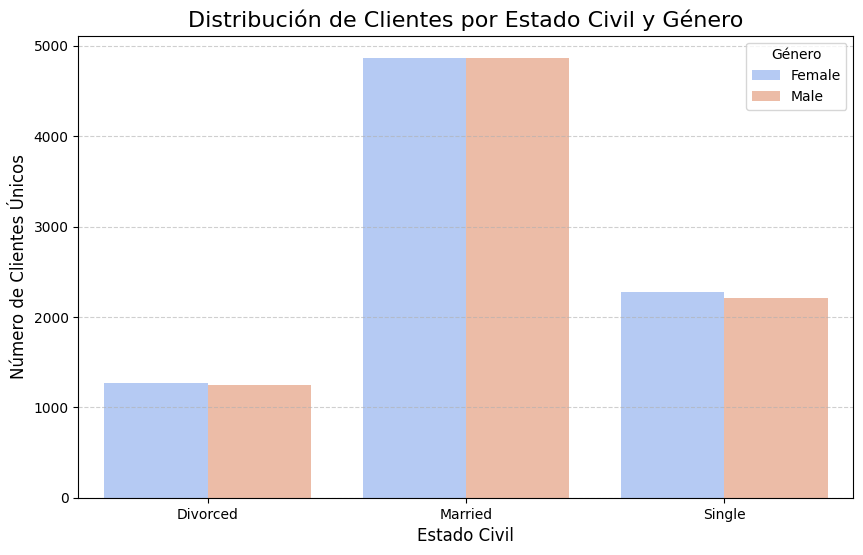

In [ ]:
df_conteo_demografico = df_clientes_unicos.groupby(['Marital Status', 'Gender']).size().reset_index(name='Total Clientes')

# --- 3. Creación del Gráfico de Barras Agrupadas ---
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_conteo_demografico,
    x="Marital Status",      # Eje X: La categoría principal (Estado Civil)
    y="Total Clientes",      # Eje Y: La métrica (Conteo de Clientes)
    hue="Gender",            # Segmentación (Color): El género
    palette="coolwarm"       
)

# --- 4. Personalización ---
plt.title("Distribución de Clientes por Estado Civil y Género", fontsize=16)
plt.xlabel("Estado Civil", fontsize=12)
plt.ylabel("Número de Clientes Únicos", fontsize=12)
plt.legend(title="Género")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

> **Interpretación**: Es una gráfica muy llamativa. No parece haber mucha relación o diferencia entre hombre o mujer entre los clientes de la aerolíea, pero si que resulta muy notoria la diferencia entre los casados con respecto a las otras categorías (sobre todo con respecto a divorciados). Como falta contexto de la aerolínea no puedo sacar unas conclusiones demasiado exactas, pero puede deverse a una mayor cantidad de familias que viajan en conjunto.